# Challenge: Improving IT service delivery to federal departments

**A. Statement**
_______________
Analyze the life cycle of incident tickets that Shared Services Canada receives to better understand the impact on our partner departments' experience. Our objective is to be able to identify tickets that are bounced between support groups or remain open for long periods of time to inform process improvements.
Background Information & Potential Datasets

**B. Data**
____________________
SSC indicents ticket data and metadata repository

**C. Background information**
_________________
Shared Services Canada (SSC) manages and supports IT infrastructure for 43 departments. One of our key metrics includes a customer satisfaction survey which identifies how departments feel SSC is providing service. Another key metric is the length of time it takes SSC to resolve incidents.

SSC’s main Information Technology Service Management (ITSM) tool currently is a tool called Enterprise Control Desk. This tool is used to track the life of service requests, incidents, problems, changes and configuration items. One area of concern is how long it takes for an incident to go from being opened to closed.

Overall, the majority of time we are meeting our targets but in many cases incidents may bounce around the organization resulting in a longer period of time before SSC resolves a ticket. Knowing when a ticket may be misassigned or open for a long period of time would help SSC improve our service delivery to our partners. Using the information provided will help improve our process to properly define which support team needs to be engaged. Additionally, defining the time between when an incident occurs and when SSC actively starts working on an incident would be another indicator to help SSC improve our processes.

**D. Some metrics and questions we have of the data include:**
__________________________________________
1. Average time that incidents spend in a particular status.
2. Number of times an incident is reassigned during the life of the ticket.
3. Average time that incidents spend with a particular Support group (Assigned_Group).
4. Mean time to restore service (MTRS), are there particular services that are taking longer on average to be restored?
5. Is there a correlation between the number of times an incident is reassigned and how long it takes to restore?
6. Are there particular organizations for whom it takes longer on average to restore services?
7. Is there a correlation to certain groups where tickets stay in a particular status that is resulting in longer times to restore service?
8. Is there a correlation to certain services where tickets are not resolved as quickly as other services leading to greater MTRS?
9. There are many Event Management tickets. What is the difference in incidents ticket including and excluding Event Management tickets?

**E. Organization**
____________________
Shared Services Canada (SSC)

# I. Exploratory Data Analysis


---



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [25]:
INCIDENTS = pd.read_csv("data/INCIDENTS.csv")
INCIDENT_OWNER_HISTORY = pd.read_csv("data/INCIDENT_OWNER_HISTORY.csv")
INCIDENT_HISTORY = pd.read_csv("data/INCIDENT_HISTORY.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)




---



In [2]:
data_02 = pd.read_csv("data/INCIDENT_OWNER_HISTORY.csv")

In [ ]:
data_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152409 entries, 0 to 1152408
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   ticket_nmbr                  1152409 non-null  object 
 1   STATUS                       1152409 non-null  object 
 2   assigned_group               992849 non-null   object 
 3   PARENT_SERVICE               992555 non-null   object 
 4   service                      992767 non-null   object 
 5   CHANGE_DATE                  1062090 non-null  object 
 6   TIME_IN_STATUS_BY_OWNER_HRS  738632 non-null   float64
dtypes: float64(1), object(6)
memory usage: 61.5+ MB


In [4]:
data_02 = data_02.fillna(0)

In [5]:
data_02 = data_02.astype({"ticket_nmbr": str, 
                          "STATUS": str,
                          "assigned_group": str,
                          "PARENT_SERVICE": str,
                          "service": str,
                          "CHANGE_DATE": str,
                          "TIME_IN_STATUS_BY_OWNER_HRS":int})

In [6]:
data_02.to_csv("Clean_INCIDENT_OWNER_HISTORY.csv")

In [7]:
data_02.STATUS.unique()

array(['QUEUED', 'RESOLVED', 'CLOSED', 'NEW', 'INPROG', 'PENDINGREV',
       'PENDING', 'PENDINGCHG', 'PENDINGVEN', 'PENDINGCUS', 'HISTEDIT',
       'AWAITCHG', 'AWAITCUS', 'SLAHOLD', 'AWAITVEN'], dtype=object)

_________

In [ ]:
data_02

,ticket_nmbr,STATUS,assigned_group,PARENT_SERVICE,service,CHANGE_DATE,TIME_IN_STATUS_BY_OWNER_HRS
0,IN10028612,QUEUED,DC000152,Middleware,Middleware,01APR2016:00:03:12,8
1,IN10028612,RESOLVED,DC000152,Middleware,Middleware,01APR2016:08:26:30,0
2,IN10028612,CLOSED,DC000152,Middleware,Middleware,12APR2016:05:30:11,0
3,IN10028613,QUEUED,NDS00032,Midrange,Midrange - Windows -X86,01APR2016:01:04:45,64
4,IN10028613,RESOLVED,NDS00032,Midrange,Midrange - Windows -X86,11APR2016:11:06:12,0
...,...,...,...,...,...,...,...
1152404,IN10293554,RESOLVED,DC000188,Midrange,Midrange,0,0
1152405,IN10293554,QUEUED,DC000188,Midrange,Midrange,0,0
1152406,IN10293555,QUEUED,DC000128,High-performance Computing,High-performance Computing,0,0
1152407,IN10293555,QUEUED,DC000250,High-performance Computing,High-performance Computing,0,0


In [ ]:
data_02[data_02["STATUS"].isin(['QUEUED'])].to_csv("QUEUED.csv")
data_02[data_02["STATUS"].isin(['RESOLVED'])].to_csv("RESOLVED.csv")
data_02[data_02["STATUS"].isin(['CLOSED'])].to_csv("CLOSED.csv")
data_02[data_02["STATUS"].isin(['NEW'])].to_csv("NEW.csv")
data_02[data_02["STATUS"].isin(['INPROG'])].to_csv("INPROG.csv")
data_02[data_02["STATUS"].isin(['PENDINGREV'])].to_csv("PENDINGREV.csv")
data_02[data_02["STATUS"].isin(['PENDING'])].to_csv("PENDING.csv")
data_02[data_02["STATUS"].isin(['PENDINGCHG'])].to_csv("PENDINGCHG.csv")
data_02[data_02["STATUS"].isin(['PENDINGVEN'])].to_csv("PENDINGVEN.csv")
data_02[data_02["STATUS"].isin(['PENDINGCUS'])].to_csv("PENDINGCUS.csv")
data_02[data_02["STATUS"].isin(['HISTEDIT'])].to_csv("HISTEDIT.csv")
data_02[data_02["STATUS"].isin(['AWAITCHG'])].to_csv("AWAITCHG.csv")
data_02[data_02["STATUS"].isin(['AWAITCUS'])].to_csv("AWAITCUS.csv")
data_02[data_02["STATUS"].isin(['SLAHOLD'])].to_csv("SLAHOLD.csv")
data_02[data_02["STATUS"].isin(['AWAITVEN'])].to_csv("AWAITVEN.csv")

In [8]:
QUEUED = data_02[data_02["STATUS"].isin(['QUEUED'])]
RESOLVED = data_02[data_02["STATUS"].isin(['RESOLVED'])]
CLOSED = data_02[data_02["STATUS"].isin(['CLOSED'])]
NEW = data_02[data_02["STATUS"].isin(['NEW'])]
INPROG = data_02[data_02["STATUS"].isin(['INPROG'])]
PENDINGREV = data_02[data_02["STATUS"].isin(['PENDINGREV'])]
PENDING = data_02[data_02["STATUS"].isin(['PENDING'])]
PENDINGCHG = data_02[data_02["STATUS"].isin(['PENDINGCHG'])]
PENDINGVEN = data_02[data_02["STATUS"].isin(['PENDINGVEN'])]
PENDINGCUS = data_02[data_02["STATUS"].isin(['PENDINGCUS'])]
HISTEDIT = data_02[data_02["STATUS"].isin(['HISTEDIT'])]
AWAITCHG = data_02[data_02["STATUS"].isin(['AWAITCHG'])]
AWAITCUS = data_02[data_02["STATUS"].isin(['AWAITCUS'])]
SLAHOLD = data_02[data_02["STATUS"].isin(['SLAHOLD'])]
AWAITVEN = data_02[data_02["STATUS"].isin(['AWAITVEN'])]

In [9]:
def getMedianStatus(df, Status):
    dfMedian = df[['assigned_group', 'TIME_IN_STATUS_BY_OWNER_HRS']]
    median = []
    for value in dfMedian.groupby('assigned_group')['TIME_IN_STATUS_BY_OWNER_HRS'].median():
        median.append(value)
    medianGroups = []
    for index in dfMedian.groupby('assigned_group')['assigned_group']:
        medianGroups.append(index[0])
    dfmediangroups = pd.DataFrame()
    dfmediangroups['groupID'] = medianGroups
    dfmediangroups[f'medianSpentTime{Status}'] = median
    return(dfmediangroups)

In [32]:
def getMedianStatus(df, Status):
    dfMedian = df[['PARENT_SERVICE', 'TIME_IN_STATUS_BY_OWNER_HRS']]
    median = []
    for value in dfMedian.groupby('PARENT_SERVICE')['TIME_IN_STATUS_BY_OWNER_HRS'].median():
        median.append(value)
    medianGroups = []
    for index in dfMedian.groupby('PARENT_SERVICE')['PARENT_SERVICE']:
        medianGroups.append(index[0])
    dfmediangroups = pd.DataFrame()
    dfmediangroups['groupID'] = medianGroups
    dfmediangroups[f'medianSpentTime{Status}'] = median
    return(dfmediangroups)

In [ ]:
def getCountStatus(df, Status):
    dfCount = df[['assigned_group', 'TIME_IN_STATUS_BY_OWNER_HRS']]
    count = []
    for value in dfCount.groupby('assigned_group')['TIME_IN_STATUS_BY_OWNER_HRS'].count():
        count.append(value)
    countGroups = []
    for index in dfCount.groupby('assigned_group')['assigned_group']:
        countGroups.append(index[0])
    dfcountgroups = pd.DataFrame()
    dfcountgroups['groupID'] = countGroups
    dfcountgroups[f'meanSpentTime{Status}'] = count
    return(dfcountgroups)

In [ ]:
def getMeanStatus(df, Status):
    dfMean = df[['ticket_nmbr', 'TIME_IN_STATUS_BY_OWNER_HRS']]
    mean = []
    for value in dfMean.groupby('ticket_nmbr')['TIME_IN_STATUS_BY_OWNER_HRS'].mean():
        mean.append(value)
    meanGroups = []
    for index in dfMean.groupby('ticket_nmbr')['ticket_nmbr']:
        meanGroups.append(index[0])
    dfmeangroups = pd.DataFrame()
    dfmeangroups['ticketID'] = meanGroups
    dfmeangroups[f'meanSpentTime{Status}'] = mean
    return(dfmeangroups)

In [33]:
QUEUED_G = getMedianStatus(QUEUED, 'QUEUED')
RESOLVED_G = getMedianStatus(RESOLVED, 'RESOLVED')
CLOSED_G = getMedianStatus(CLOSED, 'CLOSED')
NEW_G = getMedianStatus(NEW, 'NEW')
INPROG_G = getMedianStatus(INPROG, 'INPROG')
PENDINGREV_G = getMedianStatus(PENDINGREV, 'PENDINGREV')
PENDING_G = getMedianStatus(PENDING, 'PENDING')
PENDINGCHG_G = getMedianStatus(PENDINGCHG, 'PENDINGCHG')
PENDINGVEN_G = getMedianStatus(PENDINGVEN, 'PENDINGVEN')
PENDINGCUS_G = getMedianStatus(PENDINGCUS, 'PENDINGCUS')
HISTEDIT_G = getMedianStatus(HISTEDIT, 'HISTEDIT')
AWAITCHG_G = getMedianStatus(AWAITCHG, 'AWAITCHG')
AWAITCUS_G = getMedianStatus(AWAITCUS, 'AWAITCUS')
SLAHOLD_G = getMedianStatus(SLAHOLD, 'SLAHOLD')
AWAITVEN_G = getMedianStatus(AWAITVEN, 'AWAITVEN')

In [34]:
frames = [QUEUED_G, 
RESOLVED_G,
CLOSED_G,
NEW_G,
INPROG_G,
PENDINGREV_G,
PENDING_G,
PENDINGCHG_G,
PENDINGVEN_G,
PENDINGCUS_G,
HISTEDIT_G,
AWAITCHG_G,
AWAITCUS_G,
SLAHOLD_G,
AWAITVEN_G]

In [37]:
from functools import reduce
df_final = reduce(lambda left, right: pd.merge(left, right, on = 'groupID', how = 'outer'), frames)

In [38]:
df_final = df_final.fillna(0.000000)

In [14]:
df_final.columns

Index(['groupID', 'medianSpentTimeQUEUED', 'medianSpentTimeRESOLVED',
       'medianSpentTimeCLOSED', 'medianSpentTimeNEW', 'medianSpentTimeINPROG',
       'medianSpentTimePENDINGREV', 'medianSpentTimePENDING',
       'medianSpentTimePENDINGCHG', 'medianSpentTimePENDINGVEN',
       'medianSpentTimePENDINGCUS', 'medianSpentTimeHISTEDIT',
       'medianSpentTimeAWAITCHG', 'medianSpentTimeAWAITCUS',
       'medianSpentTimeSLAHOLD', 'medianSpentTimeAWAITVEN'],
      dtype='object')

_____________

# II. Questions Answers

## 01. Average time that incidents spend in a particular status:

In [ ]:
status = ['meanSpentTimeQUEUED', 'meanSpentTimeRESOLVED',
          'meanSpentTimeCLOSED', 'meanSpentTimeNEW', 'meanSpentTimeINPROG',
          'meanSpentTimePENDINGREV', 'meanSpentTimePENDING',
          'meanSpentTimePENDINGCHG', 'meanSpentTimePENDINGVEN',
          'meanSpentTimePENDINGCUS', 'meanSpentTimeHISTEDIT',
          'meanSpentTimeAWAITCHG', 'meanSpentTimeAWAITCUS',
          'meanSpentTimeSLAHOLD', 'meanSpentTimeAWAITVEN']

for stat in status:
    print(f"- Avarage Time that a Single Incident spend in {stat.replace('meanSpentTime', '')} Status: {df_final[stat].mean()} h")

- Avarage Time that a Single Incident spend in QUEUED Status: 30.61188338143856 h
- Avarage Time that a Single Incident spend in RESOLVED Status: 0.10524269098879344 h
- Avarage Time that a Single Incident spend in CLOSED Status: 0.0 h
- Avarage Time that a Single Incident spend in NEW Status: 6.186587478346944e-05 h
- Avarage Time that a Single Incident spend in INPROG Status: 10.58379487470493 h
- Avarage Time that a Single Incident spend in PENDINGREV Status: 0.5284935070291418 h
- Avarage Time that a Single Incident spend in PENDING Status: 0.30914119854821415 h
- Avarage Time that a Single Incident spend in PENDINGCHG Status: 0.0496849259377099 h
- Avarage Time that a Single Incident spend in PENDINGVEN Status: 0.30013213835398056 h
- Avarage Time that a Single Incident spend in PENDINGCUS Status: 0.37200954249554313 h
- Avarage Time that a Single Incident spend in HISTEDIT Status: 0.012521947655577945 h
- Avarage Time that a Single Incident spend in AWAITCHG Status: 1.51814997466

__________

## 02. Number of times an Incident is Reassigned during the life of the Ticket:

In [ ]:
data_02['ticket_nmbr'].value_counts()

In [ ]:
data_02.sample(2)

,ticket_nmbr,STATUS,assigned_group,PARENT_SERVICE,service,CHANGE_DATE,TIME_IN_STATUS_BY_OWNER_HRS
406946,IN10125530,INPROG,EDC00010,Directory Services,Directory Services,05FEB2019:14:22:19,9
552761,IN10159447,RESOLVED,DC000107,Data Centre Facilities Management,Data Centre Facilities Management,01OCT2019:14:08:20,0


In [30]:
df = data_02[['ticket_nmbr', 'STATUS']]
df = df.groupby(['ticket_nmbr']).size().reset_index(name = 'count')

In [ ]:
df['count'] = 

In [ ]:
i = 1
while i < 21:
    print(f"- Number of Tickets that has = {i} status in a Life Cycle: {len(df[df['count']==i])}")
    i+= 1

- Number of Tickets that has = 1 status in a Life Cycle: 24
- Number of Tickets that has = 2 status in a Life Cycle: 781
- Number of Tickets that has = 3 status in a Life Cycle: 29582
- Number of Tickets that has = 4 status in a Life Cycle: 61036
- Number of Tickets that has = 5 status in a Life Cycle: 63628
- Number of Tickets that has = 6 status in a Life Cycle: 39442
- Number of Tickets that has = 7 status in a Life Cycle: 15424
- Number of Tickets that has = 8 status in a Life Cycle: 7356
- Number of Tickets that has = 9 status in a Life Cycle: 3782
- Number of Tickets that has = 10 status in a Life Cycle: 1983
- Number of Tickets that has = 11 status in a Life Cycle: 1203
- Number of Tickets that has = 12 status in a Life Cycle: 739
- Number of Tickets that has = 13 status in a Life Cycle: 411
- Number of Tickets that has = 14 status in a Life Cycle: 272
- Number of Tickets that has = 15 status in a Life Cycle: 173
- Number of Tickets that has = 16 status in a Life Cycle: 129
- Nu

In [19]:
39442+15424+7356+3782+1983+1203+739+411+272+173+129+99+55+42+41

71151

- We assume that the number of reassigned ticket is the number of tickets that has more that 5 status = 71151 tickets.

## 3. Average time that incidents spend with a particular Support group (Assigned_Group):

In [ ]:
df = data_02[['ticket_nmbr', 'assigned_group', 'TIME_IN_STATUS_BY_OWNER_HRS']]

In [ ]:
df

,ticket_nmbr,assigned_group,TIME_IN_STATUS_BY_OWNER_HRS
0,IN10028612,DC000152,8
1,IN10028612,DC000152,0
2,IN10028612,DC000152,0
3,IN10028613,NDS00032,64
4,IN10028613,NDS00032,0
...,...,...,...
1152404,IN10293554,DC000188,0
1152405,IN10293554,DC000188,0
1152406,IN10293555,DC000128,0
1152407,IN10293555,DC000250,0


In [22]:
df_final = df_final.drop(0)

In [23]:
df_final

,groupID,medianSpentTimeQUEUED,medianSpentTimeRESOLVED,medianSpentTimeCLOSED,medianSpentTimeNEW,medianSpentTimeINPROG,medianSpentTimePENDINGREV,medianSpentTimePENDING,medianSpentTimePENDINGCHG,medianSpentTimePENDINGVEN,medianSpentTimePENDINGCUS,medianSpentTimeHISTEDIT,medianSpentTimeAWAITCHG,medianSpentTimeAWAITCUS,medianSpentTimeSLAHOLD,medianSpentTimeAWAITVEN,TotalTime
1,1769,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,AP000001,35,1,0,0,3,0,0,0,0,0,0,1,1,0,0,41
3,AP000003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,AP000004,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
5,AP000005,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,NW000491,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
584,PMCHGMA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
585,EU000211,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
586,ITS00366,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


**This table show the time spend in avrage by each group in all the status for a single ticket**

In [28]:
df_final['TotalTime'] = df_final.iloc[:,:].sum(axis=1)
print("This table show the time spend in avrage by each group in all the status for a single ticket:")
df_final[['groupID', 'TotalTime']].sort_values(by = ['TotalTime'], ascending = False)

This table show the time spend in avrage by each group in all the status for a single ticket:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,groupID,TotalTime
117,DC000203,267380
254,ESI00011,249265
75,DC000152,212715
418,NW000417,198375
413,NW000412,190325
...,...,...
523,PM000620,5
259,ESI00016,5
270,ESI00048,5
272,ESI00050,5


## 4. Mean time to restore service (MTRS), are there particular services that are taking longer on average to be restored?

In [ ]:
dfSTATUS = data_02[['STATUS']]
dfSTATUS = dfSTATUS.groupby(['STATUS']).size().reset_index(name = 'count')

In [ ]:
dfSTATUS

,STATUS,count
0,AWAITCHG,3841
1,AWAITCUS,31056
2,AWAITVEN,16467
3,CLOSED,224118
4,HISTEDIT,184
5,INPROG,116360
6,NEW,155879
7,PENDING,1496
8,PENDINGCHG,109
9,PENDINGCUS,1321


## 08. Is there a correlation to certain groups where tickets stay in a particular status that is resulting in longer times to restore service?

In [ ]:
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax.grid(color='#2A3459')  # bluish dark grey, but slightly lighter than background

In [ ]:
df_final.columns

Index(['ticketID', 'meanSpentTimeQUEUED', 'meanSpentTimeRESOLVED',
       'meanSpentTimeCLOSED', 'meanSpentTimeNEW', 'meanSpentTimeINPROG',
       'meanSpentTimePENDINGREV', 'meanSpentTimePENDING',
       'meanSpentTimePENDINGCHG', 'meanSpentTimePENDINGVEN',
       'meanSpentTimePENDINGCUS', 'meanSpentTimeHISTEDIT',
       'meanSpentTimeAWAITCHG', 'meanSpentTimeAWAITCUS',
       'meanSpentTimeSLAHOLD', 'meanSpentTimeAWAITVEN'],
      dtype='object')

In [17]:
# df_final = df_final.astype({"ticketID": str, 
#                             "meanSpentTimeQUEUED": int,
#                             "meanSpentTimeRESOLVED": int,
#                             "meanSpentTimeCLOSED": int,
#                             "meanSpentTimeNEW": int,
#                             "meanSpentTimeINPROG": int,
#                             "meanSpentTimePENDINGREV": int,
#                             "meanSpentTimePENDING": int,
#                             "meanSpentTimePENDINGCHG": int,
#                             "meanSpentTimePENDINGVEN": int,
#                             "meanSpentTimePENDINGCUS": int,
#                             "meanSpentTimeHISTEDIT": int,
#                             "meanSpentTimeAWAITCHG": int,
#                             "meanSpentTimeAWAITCUS": int,
#                             "meanSpentTimeSLAHOLD": int,
#                             "meanSpentTimeAWAITVEN": int})


# df_final = df_final.astype({"groupID": str, 
#                             "sumSpentTimeQUEUED": int,
#                             "sumSpentTimeRESOLVED": int,
#                             "sumSpentTimeCLOSED": int,
#                             "sumSpentTimeNEW": int,
#                             "sumSpentTimeINPROG": int,
#                             "sumSpentTimePENDINGREV": int,
#                             "sumSpentTimePENDING": int,
#                             "sumSpentTimePENDINGCHG": int,
#                             "sumSpentTimePENDINGVEN": int,
#                             "sumSpentTimePENDINGCUS": int,
#                             "sumSpentTimeHISTEDIT": int,
#                             "sumSpentTimeAWAITCHG": int,
#                             "sumSpentTimeAWAITCUS": int,
#                             "sumSpentTimeSLAHOLD": int,
#                             "sumSpentTimeAWAITVEN": int})

df_final = df_final.astype({"groupID": str, 
                            'medianSpentTimeQUEUED': int, 
                            'medianSpentTimeRESOLVED': int,
                            'medianSpentTimeCLOSED': int, 
                            'medianSpentTimeNEW': int, 
                            'medianSpentTimeINPROG': int,
                            'medianSpentTimePENDINGREV': int, 
                            'medianSpentTimePENDING': int,
                            'medianSpentTimePENDINGCHG': int, 
                            'medianSpentTimePENDINGVEN': int,
                            'medianSpentTimePENDINGCUS': int, 
                            'medianSpentTimeHISTEDIT': int,
                            'medianSpentTimeAWAITCHG': int, 
                            'medianSpentTimeAWAITCUS': int,
                            'medianSpentTimeSLAHOLD': int, 
                            'medianSpentTimeAWAITVEN': int})

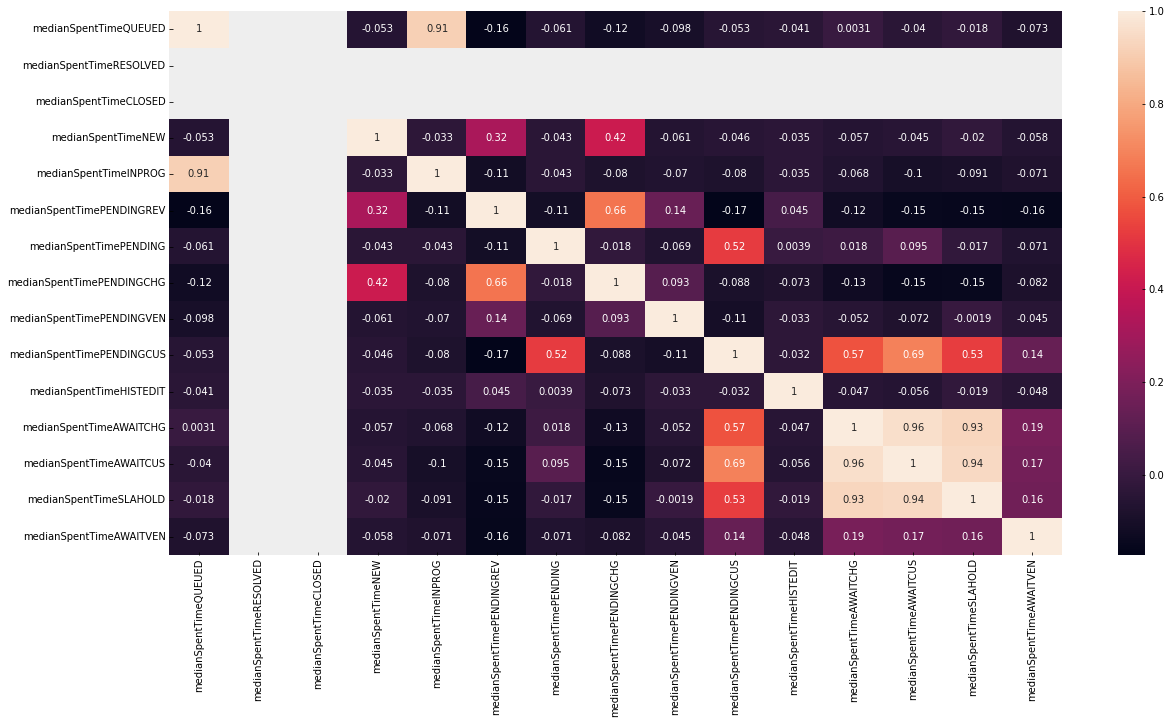

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Tahoma']
sns.heatmap(df_final.corr(), annot=True);

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


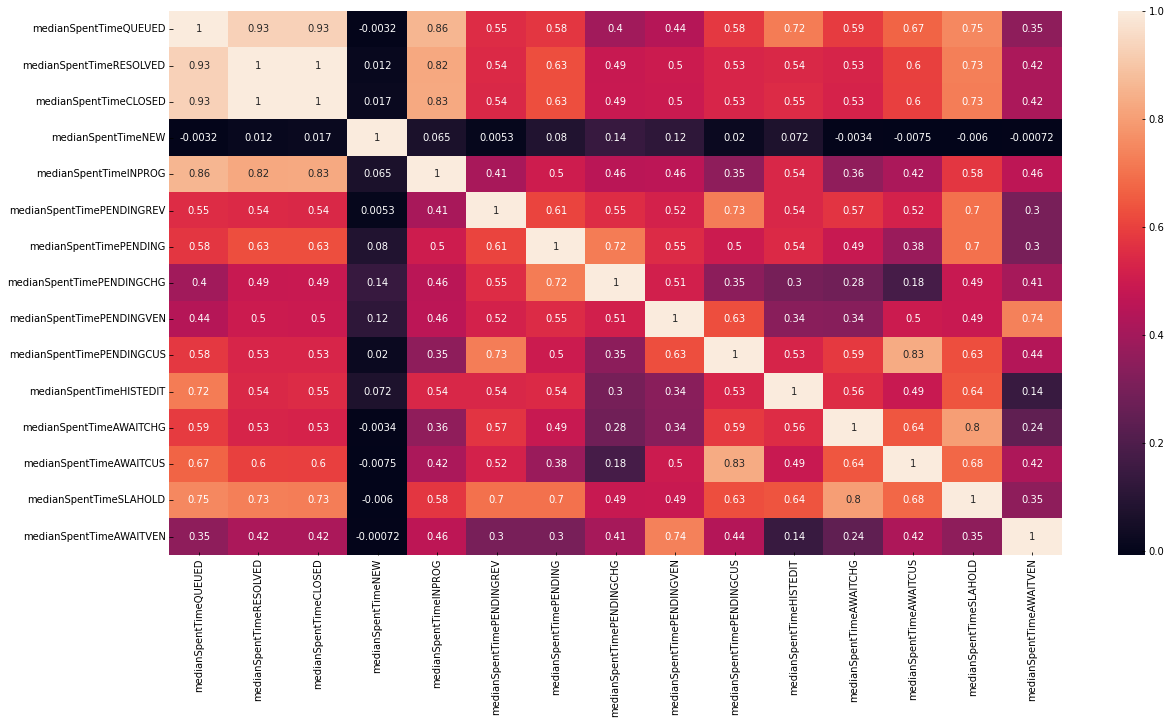

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Tahoma']
sns.heatmap(df_final.corr(), annot=True);

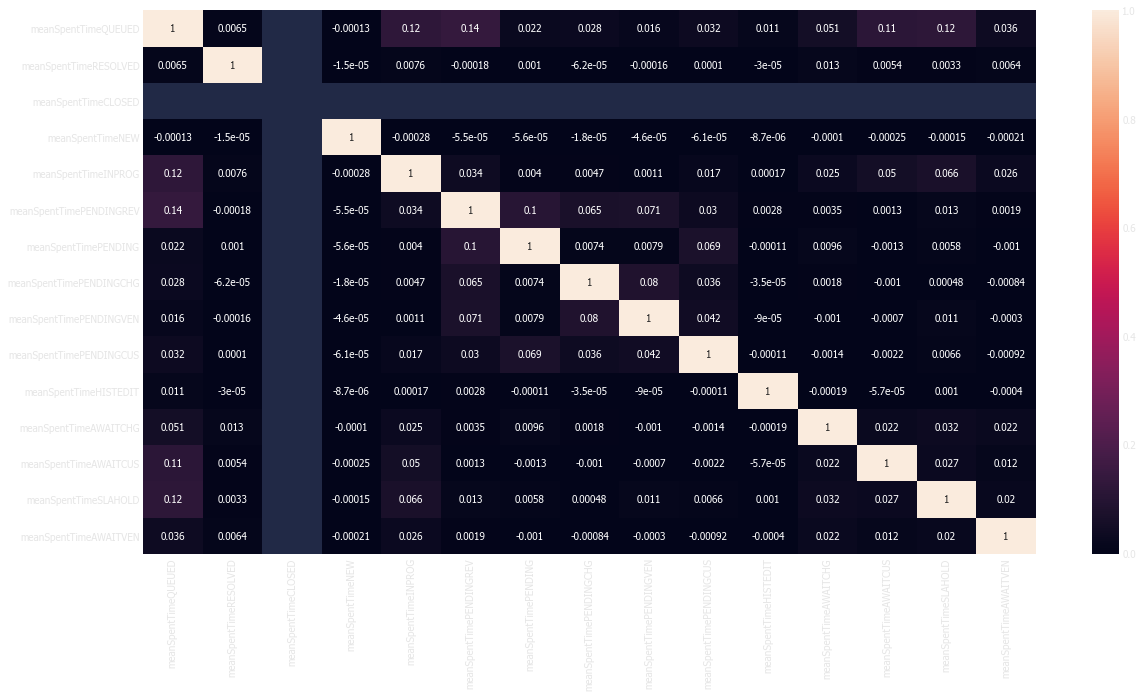

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Tahoma']
sns.heatmap(df_final.corr(), annot=True);

In [ ]:
df_final.to_csv("df_finalMean.csv")

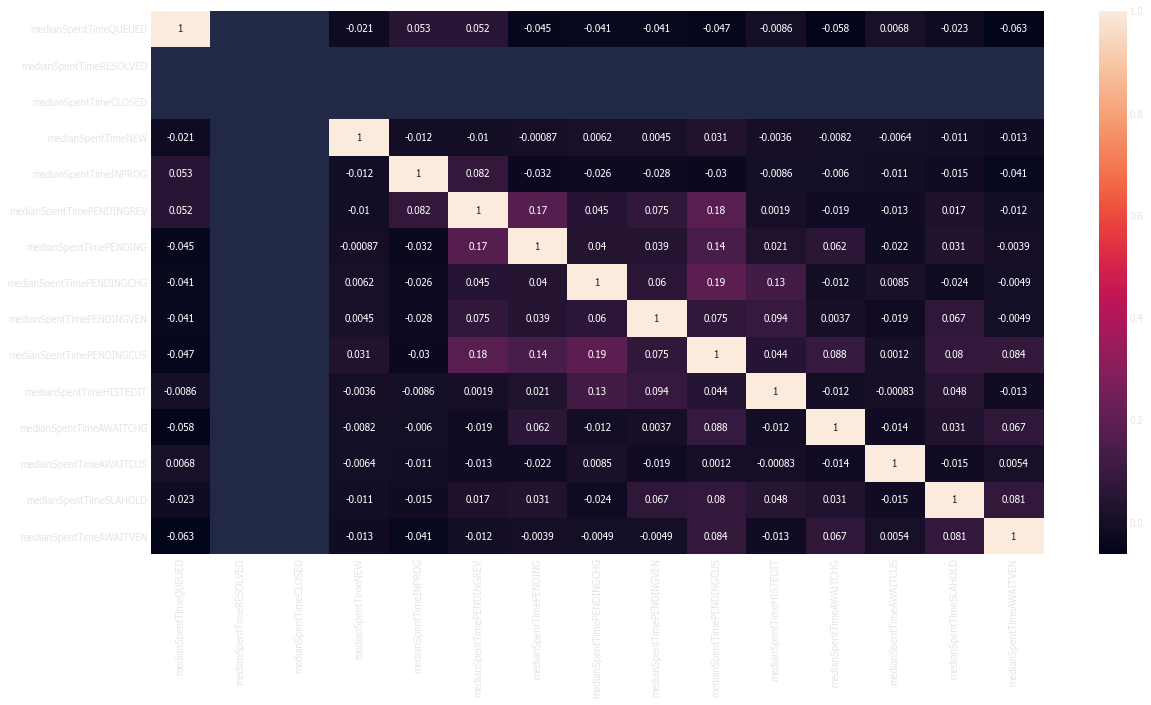

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Tahoma']
sns.heatmap(df_final.corr(), annot=True);

In [ ]:
df_final.groupID.unique()

array([0, '1769', 'AP000001', 'AP000003', 'AP000004', 'AP000005',
       'AP000006', 'AP000007', 'AP000009', 'AP000011', 'AP000012',
       'CB000600', 'CB000601', 'CG4TECH', 'CHAT_Q', 'CHNGMGMT',
       'COR00055', 'COR00550', 'COR00551', 'COR00552', 'COR00553',
       'COR00554', 'COR00555', 'COR00556', 'COR00557', 'COR00558',
       'COR00559', 'CRM00002', 'DC000101', 'DC000102', 'DC000103',
       'DC000104', 'DC000105', 'DC000106', 'DC000107', 'DC000108',
       'DC000109', 'DC000110', 'DC000111', 'DC000112', 'DC000113',
       'DC000114', 'DC000115', 'DC000116', 'DC000117', 'DC000118',
       'DC000119', 'DC000120', 'DC000121', 'DC000122', 'DC000123',
       'DC000125', 'DC000126', 'DC000127', 'DC000128', 'DC000129',
       'DC000130', 'DC000131', 'DC000132', 'DC000133', 'DC000134',
       'DC000135', 'DC000138', 'DC000139', 'DC000140', 'DC000141',
       'DC000142', 'DC000143', 'DC000145', 'DC000146', 'DC000147',
       'DC000148', 'DC000149', 'DC000150', 'DC000151', 'DC000152',

In [ ]:
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
ax.grid(color='#2A3459')  # bluish dark grey, but slightly lighter than background

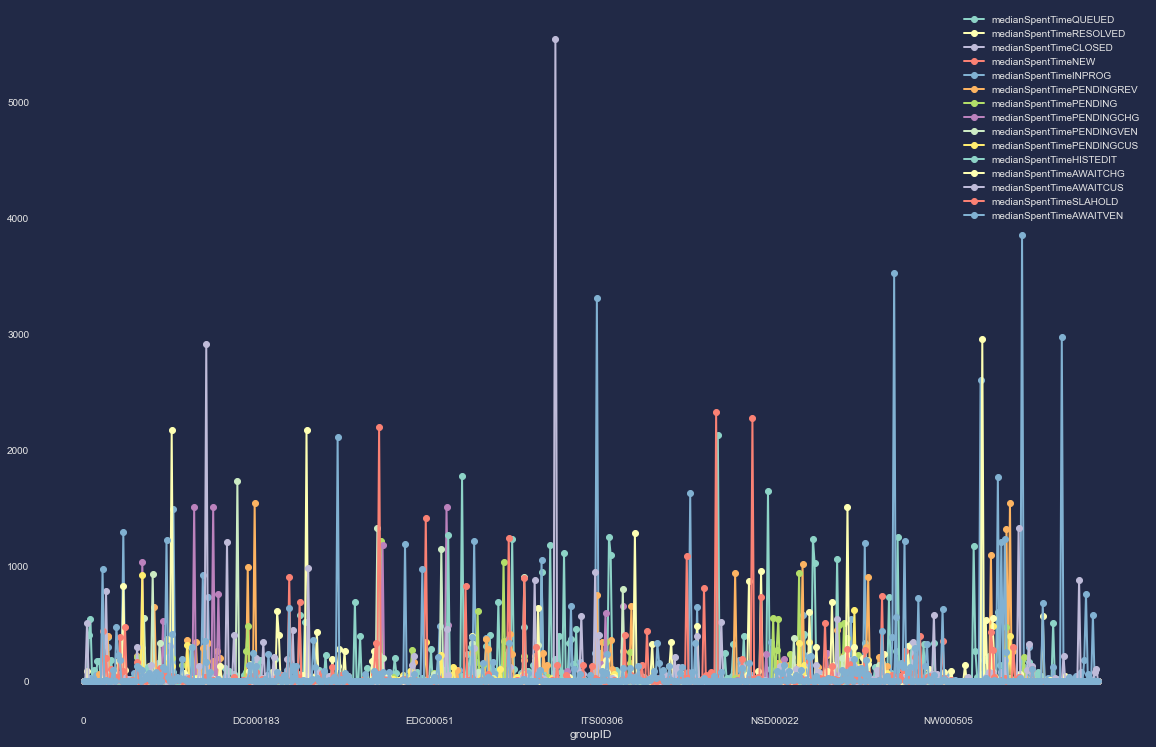

In [ ]:
fig, ax = plt.subplots()
n_lines = 50
diff_linewidth = 1.05
alpha_value = 3
    
df_final.plot(x = 'groupID', 
              marker='o', 
              ax = ax,
              figsize = (20, 13))
plt.show()

## 09. There are many Event Management tickets. What is the difference in incidents ticket including and excluding Event Management tickets?

# III. Objectif:

Our objective is to be able to identify tickets that are bounced between support groups or remain open for long periods of time to inform process improvements.